# Data Collection

Load the California housing dataset from `data/raw`.


In [1]:
from pathlib import Path
import pandas as pd
from sys import path

def load_housing_data():
    data_path = Path("../data/raw/california_housing.csv")
    return  pd.read_csv(data_path)

housing_data_set = load_housing_data()
housing_data_set= housing_data_set.sort_values(by="population",ascending=True)
housing_data_set.head()
# housing_data_set.info()
# housing_data_set["ocean_proximity"].value_counts()
# housing_data_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,350000.0,<1H OCEAN
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.536,275000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.375,137500.0,INLAND
3125,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.625,275000.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.625,55000.0,INLAND


## Get insights from the data

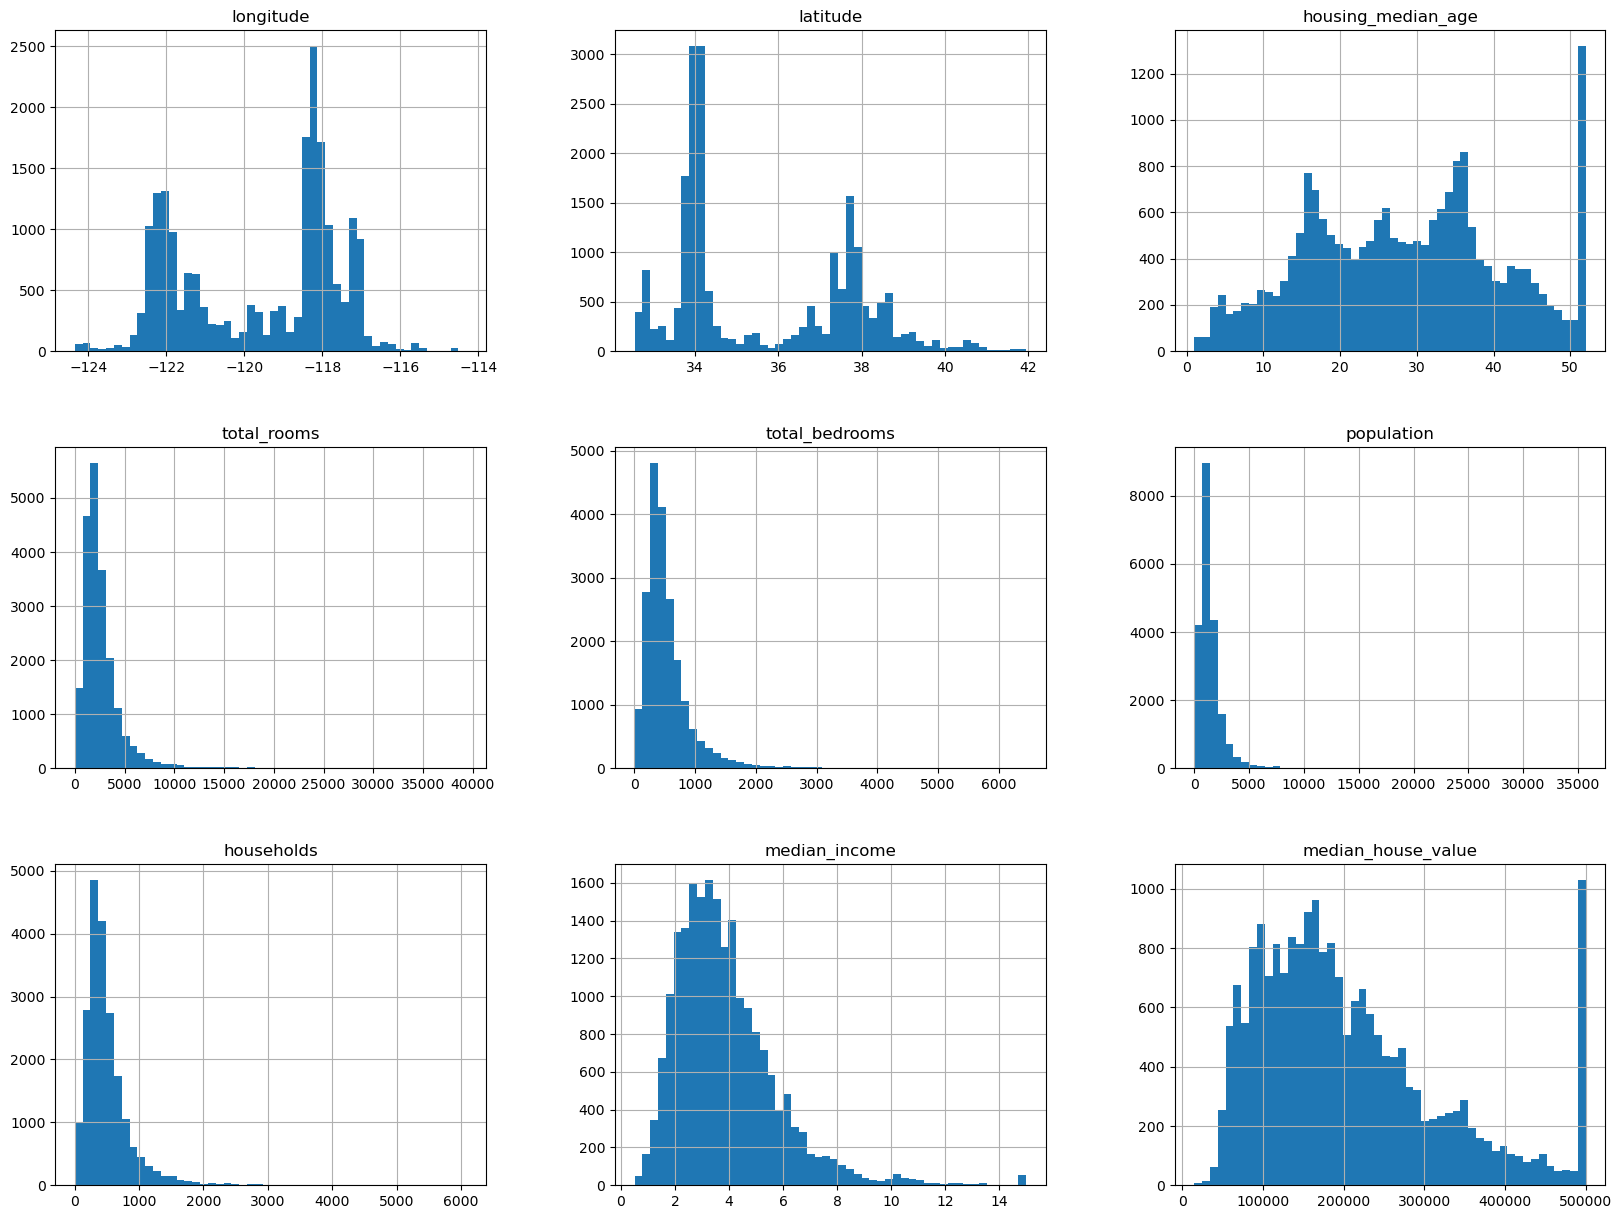

In [2]:
import matplotlib.pyplot as plt
housing_data_set.hist(bins=50,figsize=(20,15))
plt.show()

## Split train_test


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     var = crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#     # print(var)
#     return var

# def split_train_test(data,test_ratio,id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]

# housing_data_set_with_id = housing_data_set.reset_index()

# train_set,test_set = split_train_test(housing_data_set_with_id,0.2,"index")

# # print(train_set.info())
train_set,test_set = train_test_split(housing_data_set,test_size=0.2,random_state=42)

# # print(housing_data_set_with_id.head())


5342     0.5360
12458    0.5360
3126     2.3750
3125     1.6250
12286    1.6250
          ...  
6057     6.0191
10309    7.4947
13139    4.9516
9880     2.3087
15360    2.5729
Name: median_income, Length: 20640, dtype: float64


/tmp/ipykernel_13357/4150035816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data_set["income_cat"].where(housing_data_set["income_cat"] < 5, 5.0, inplace=True)


<Axes: >

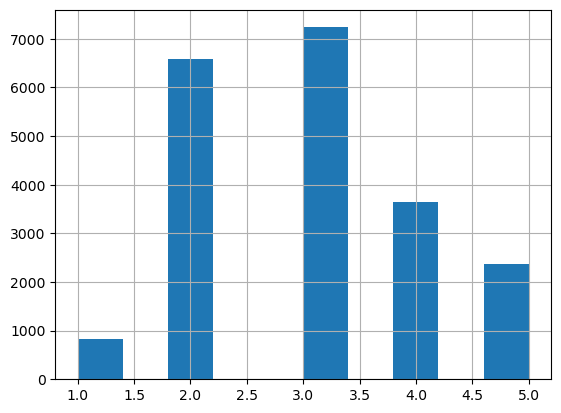

In [4]:
import numpy as np
# Chosing the strata
print(housing_data_set["median_income"])
housing_data_set["income_cat"] = np.ceil(housing_data_set["median_income"] / 1.5)
housing_data_set["income_cat"].where(housing_data_set["income_cat"] < 5, 5.0, inplace=True)
housing_data_set["income_cat"].hist()

In [5]:
# Stratify Sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
print(split)

for train_index,test_index in split.split(housing_data_set,housing_data_set["income_cat"]):
    strat_train_set = housing_data_set.loc[train_index]
    strat_test_set = housing_data_set.loc[test_index]


print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(housing_data_set["income_cat"].value_counts() / len(housing_data_set))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis = 1,inplace = True )

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
income_cat
3.0    0.363614
2.0    0.310320
4.0    0.173450
5.0    0.112161
1.0    0.040455
Name: count, dtype: float64
income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64
income_cat
3.0    0.347323
2.0    0.320979
4.0    0.177023
5.0    0.115007
1.0    0.039668
Name: count, dtype: float64


## Working on training set separately

In [6]:
housing_train_set = train_set.copy()

## Visualizing geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

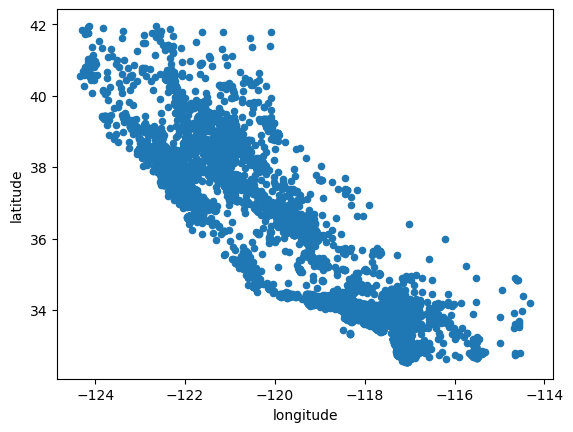

In [7]:
housing_train_set.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

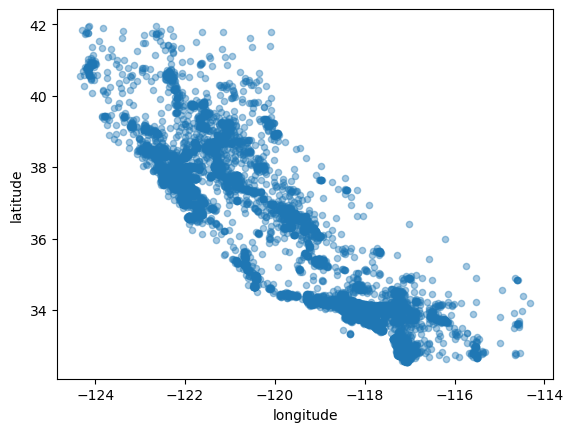

In [8]:
housing_train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4)


## Enhancing the visualizations

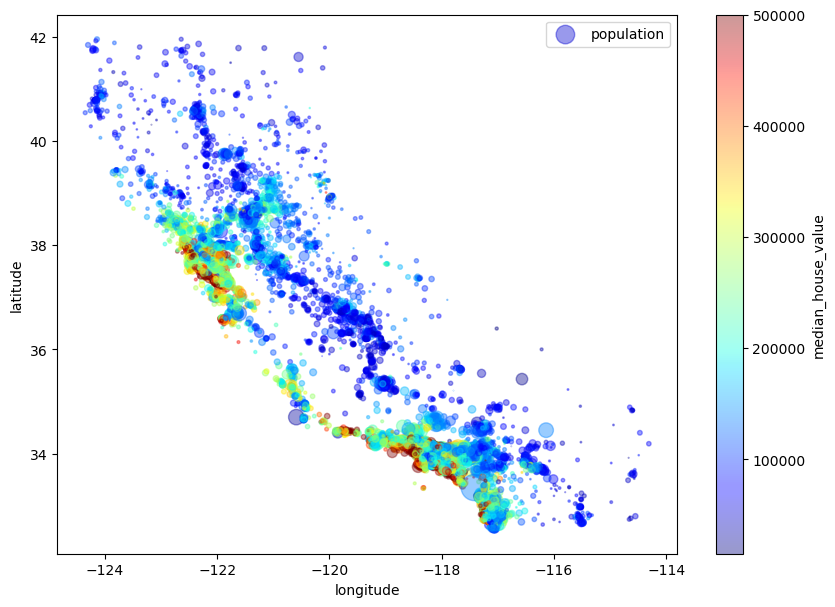

In [9]:
housing_train_set.plot(kind="scatter" , x = "longitude", y = "latitude",alpha = 0.4, 
s = housing_train_set["population"] / 100, label = "population", figsize = (10,7),
c ="median_house_value",cmap = "jet",colorbar = True)                

plt.legend()


## Finding the relationship between different numeric_columns

In [10]:
import numpy as np
num_df = housing_train_set.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
# corr_matrix
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.906353
total_bedrooms        0.876746
total_rooms           0.855624
longitude             0.099512
median_income         0.006367
median_house_value   -0.024045
latitude             -0.108941
housing_median_age   -0.297573
Name: population, dtype: float64

## Creating A Scatter Matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

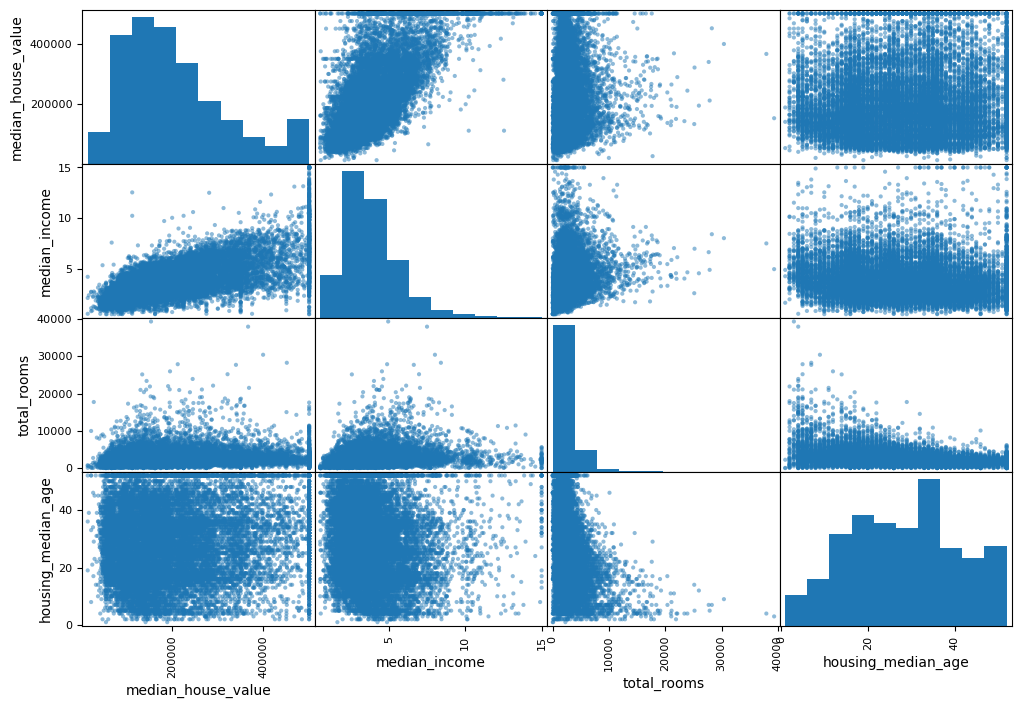

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_train_set[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

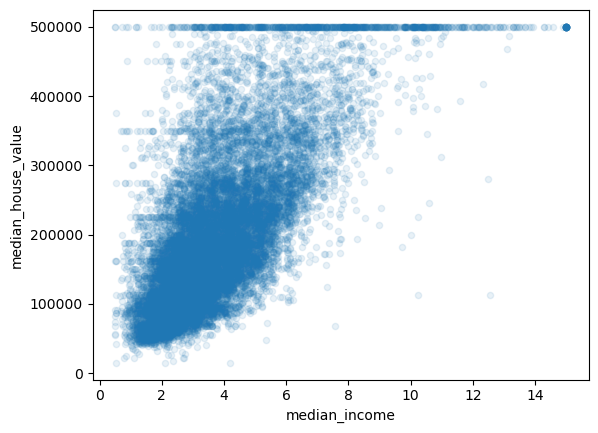

In [12]:
housing_train_set.plot(kind="scatter" , x="median_income" , y="median_house_value",alpha = 0.1)

### Expermenting with Attribute Combinations

In [13]:
housing_train_set["rooms_per_household"] = housing_train_set["total_rooms"] / housing_train_set["households"]
# print(housing_train_set["rooms_per_household"])
housing_train_set["bedrooms_per_room"] = housing_train_set["total_bedrooms"] / housing_train_set["total_rooms"] 
# print(housing_train_set["bedrooms_per_room"])
# print(housing_train_set.columns)

# Population per households
housing_train_set["population_per_household"] = housing_train_set["population"] / housing_train_set["households"]
# print(housing_train_set["population_per_household"])

num_df = housing_train_set.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690615
rooms_per_household         0.156823
total_rooms                 0.137100
housing_median_age          0.110611
households                  0.066385
total_bedrooms              0.051274
population                 -0.024045
population_per_household   -0.037134
longitude                  -0.044683
latitude                   -0.144869
bedrooms_per_room          -0.256512
Name: median_house_value, dtype: float64

In [14]:
#Prepare the data for machine learning algorithms
housing_train_set = strat_train_set.drop(["median_house_value"],axis=1)
housing_train_set_labels = strat_train_set["median_house_value"].copy()


### Data cleaning

In [15]:
# housing_train_set.info()
median_bedrooms = housing_train_set["total_bedrooms"].median()
print(median_bedrooms)
housing_train_set["total_bedrooms"].fillna(median_bedrooms,inplace = True)
housing_train_set.info()

435.0
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13272 to 19895
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


/tmp/ipykernel_13357/3652440371.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_train_set["total_bedrooms"].fillna(median_bedrooms,inplace = True)


In [16]:
#Working with the imputers
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

housing_train_set_num = housing_train_set.drop("ocean_proximity",axis=1)
imputer.fit(housing_train_set_num)
# print(imputer.statistics_
X = imputer.transform(housing_train_set_num)

housing_tr = pd.DataFrame(X,columns = housing_train_set_num.columns)
print(housing_tr)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -117.62     34.13                20.0       3216.0           516.0   
1        -117.24     32.75                33.0       1980.0           614.0   
2        -118.62     34.26                15.0      10860.0          1653.0   
3        -117.09     32.65                25.0       3509.0           985.0   
4        -121.55     38.55                10.0       6227.0          1164.0   
...          ...       ...                 ...          ...             ...   
16507    -117.11     32.71                30.0       1729.0           457.0   
16508    -117.68     34.08                21.0       5662.0          1185.0   
16509    -120.85     37.75                26.0         28.0             4.0   
16510    -122.76     38.52                 6.0       2073.0           388.0   
16511    -119.21     36.30                23.0        951.0           235.0   

       population  households  median_income  
0   

## Working with the categorical features

In [17]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

housing_cat = housing_train_set[["ocean_proximity"]]
# print(housing_cat)
# ordinal_encoder = OrdinalEncoder()
# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# print(len(housing_cat_encoded))
onehot_encoder = OneHotEncoder()

housing_cat_encoded = onehot_encoder.fit_transform(housing_cat)

# print(housing_cat_encoded)

housing_cat_encoded.toarray()
print(housing_cat_encoded)
onehot_encoder.categories_

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 1)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 1)	1.0
  (16492, 0)	1.0
  (16493, 1)	1.0
  (16494, 4)	1.0
  (16495, 1)	1.0
  (16496, 0)	1.0
  (16497, 3)	1.0
  (16498, 4)	1.0
  (16499, 1)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 4)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 4)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [21]:
from sklearn.base import BaseEstimator , TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room = False)
housing_extra_attributes = attr_adder.transform(housing_train_set.values)


### Feature Scaling


In [ ]:
#Two ways to have the same scale
# Min-max scaling and standardization

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributeAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_train_set)

NameError: name 'housing_num' is not defined